"--": 강수 현상이 없음을 표시 (0.0: 강수 현상은 있으나 미미하여 측정되지 않음)

"x","///","#": 데이터 결손

공백: 일출 전이나 일몰 후 일조시간을 나타냄

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
tmp = pd.read_csv(
    u'/content/drive/MyDrive/파이썬코드/전력량예측/47891_city.csv', #unicode
    parse_dates={'date_hour': ["일시"]},
    index_col = "date_hour",
    na_values="×" 
)
# parse_dates : "일시" column을 문자열이 아닌 날짜/시간 형태로 인식
# index_col : "date_hour"를 인덱스로 사용
# na_values : 'x'로 표시된 값을 NaN으로 처리

In [4]:
del tmp["시"]  # [시] 열은 사용하지 않으므로 삭제

In [5]:
# 열 이름 영어로 변경
columns = {
    "강수량(mm)": "rain",
    "기온(℃)": "temperature",
    "일조시간(h)": "sunhour",
    "습도(％)": "humid",
}
tmp.rename(columns=columns, inplace=True)
# inplace : 수정된 데이터프레임을 유지할 것인가
# True인 경우 유지, False 인경우 유지하지 않음

In [6]:
import matplotlib.pyplot as plt

In [7]:
delta = tmp.index - pd.to_datetime('2012/07/01 00:00:00')
tmp['time'] = delta.days + delta.seconds / 3600.0 / 24.0
# "time" 열에 기준점으로 부터 몇일 지났는지 기록

Text(0, 0.5, 'Temperature(C degree)')

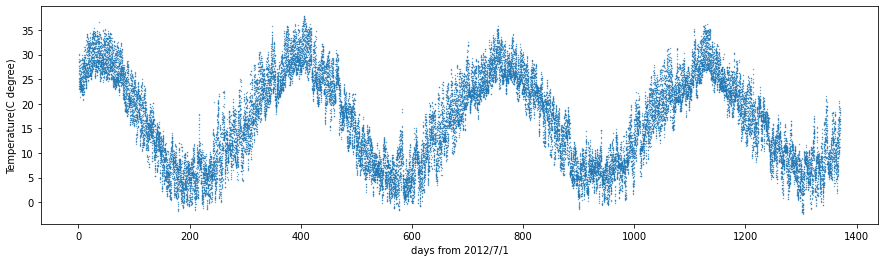

In [8]:
plt.figure(figsize=(15,4))
plt.scatter(tmp['time'], tmp['temperature'], s=0.1)
plt.xlabel('days from 2012/7/1')
plt.ylabel('Temperature(C degree)')

Text(0, 0.5, 'Temperature(C degree)')

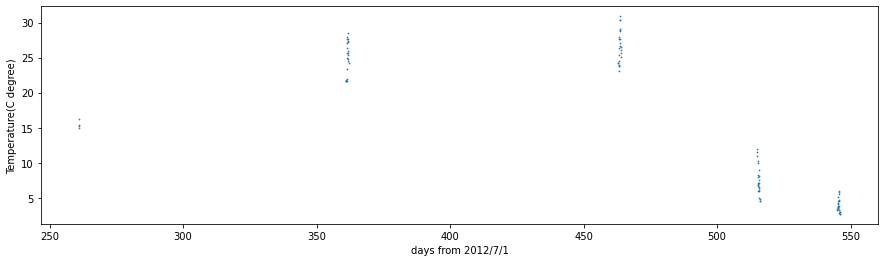

In [13]:
plt.figure(figsize=(15,4))
plt.scatter(tmp['time'][:100], tmp['temperature'][:100], s=0.5)
plt.xlabel('days from 2012/7/1')
plt.ylabel('Temperature(C degree)')

Text(0, 0.5, 'Temperature(C degree)')

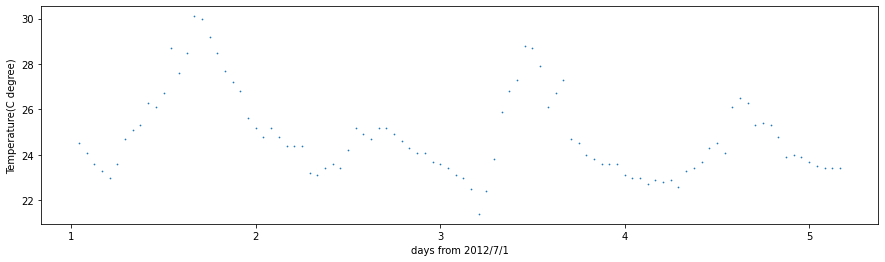

In [12]:
tmp2 = tmp.sort_values('time')
plt.figure(figsize=(15,4))
plt.scatter(tmp2['time'][:100], tmp2['temperature'][:100], s=0.5)
plt.xlabel('days from 2012/7/1')
plt.ylabel('Temperature(C degree)')